## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D = 0.20          # initial density of positive opinions 
w = 0.90          # Individuals' risk perception parameter
alpha = 0.1       # Infected -> recovers -> Susceptible 

phi = 0.01        # Resusceptibility probability : vaccinated -> susceptible 
N = 10000         # Population size
mcs = 100         # Monte Carlo steps

In [3]:
lambda_values = [0.1, 0.6, 0.7, 0.8] 

### Following the fluxogram

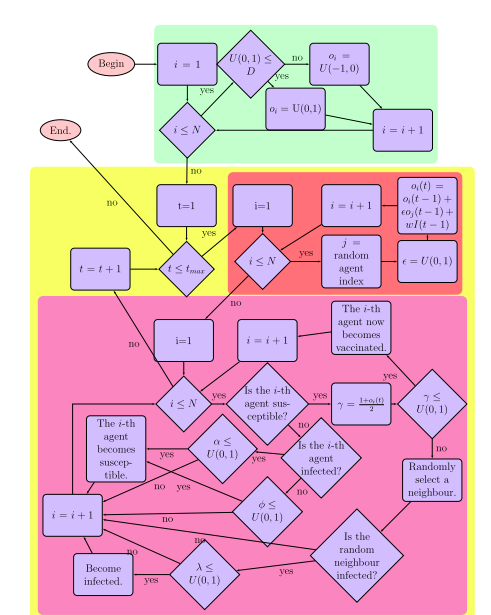

The conditions: <br>
$D~\ge~U(0, 1) $ <br>
$\gamma ~ \le ~ U(0, 1)$ <br>
$\phi ~ \le ~ U(0, 1)$ <br>
$\alpha ~ \le ~ U(0, 1)$ <br>
$\lambda ~ \le ~ U(0, 1)$ 

In [315]:

def simulate(lambda_value):
    global D, w, alpha, phi, N, mcs, time_series_infected, time_series_vaccinated, time_series_average_opinion
    
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    # random_indices = np.random.randint(0, N, 10)
    # for i in random_indices:
    #     infected[i] = 1
    #     susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    # run the simulations
    for k in range(0, mcs):
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)
        
        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.sum(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) >= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                # Susceptible -> Infected transition
                # elif np.random.uniform(0, 1) >= (1 - gamma[i]) * lambda_value * max(np.sum(infected), 1):
                #     infected[i] = 1
                #     susceptible[i] = 0
                #     print("Infection")
                elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) >= lambda_value:
                    infected[i] = 1
                    susceptible[i] = 0
                    print("Infection")
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) >= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) >= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


/tmp/ipykernel_30455/600304980.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


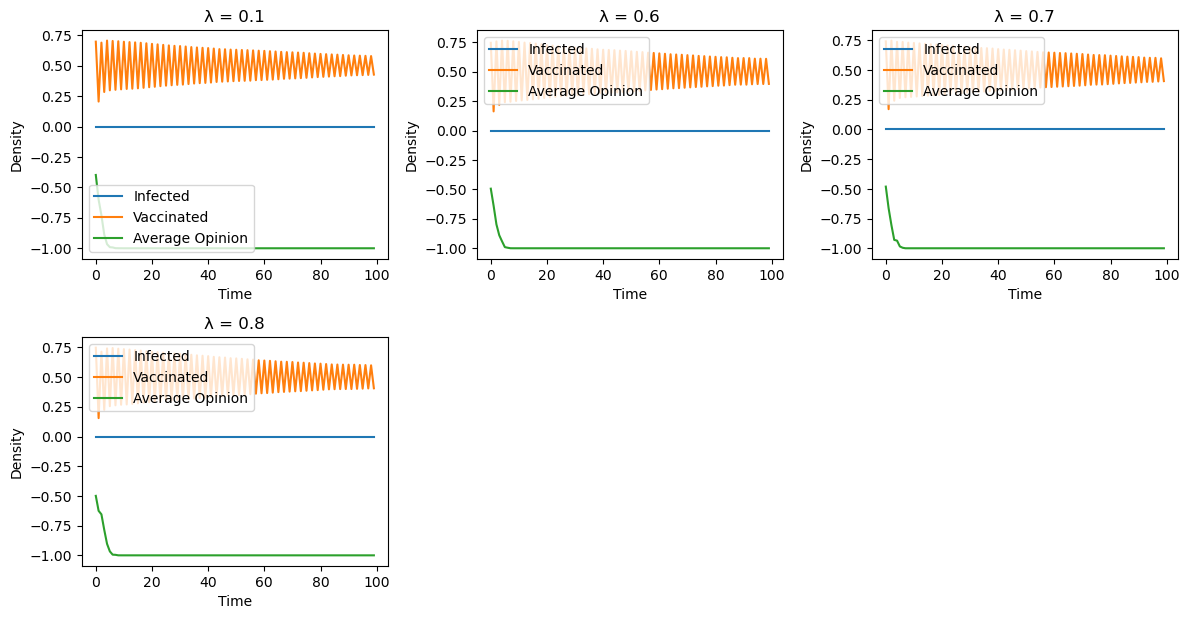

In [316]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()


### Not following the fluxogram - conditions

The conditions: <br>
$D~\ge~U(0, 1) $ <br>
$\gamma ~ \ge ~ U(0, 1)$ <br>
$\phi ~ \ge ~ U(0, 1)$ <br>
$\alpha ~ \ge ~ U(0, 1)$ <br>
$\lambda ~ \ge ~ U(0, 1)$ 

In [320]:

def simulate(lambda_value):
    global D, w, alpha, phi, N, mcs, time_series_infected, time_series_vaccinated, time_series_average_opinion
    
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    # random_indices = np.random.randint(0, N, 10)
    # for i in random_indices:
    #     infected[i] = 1
    #     susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    # run the simulations
    for k in range(0, mcs):
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)
        
        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.sum(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                # Susceptible -> Infected transition
                # elif np.random.uniform(0, 1) >= (1 - gamma[i]) * lambda_value * max(np.sum(infected), 1):
                #     infected[i] = 1
                #     susceptible[i] = 0
                #     print("Infection")
                elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value:
                    infected[i] = 1
                    susceptible[i] = 0
                    print("Infection")
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


/tmp/ipykernel_30455/600304980.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


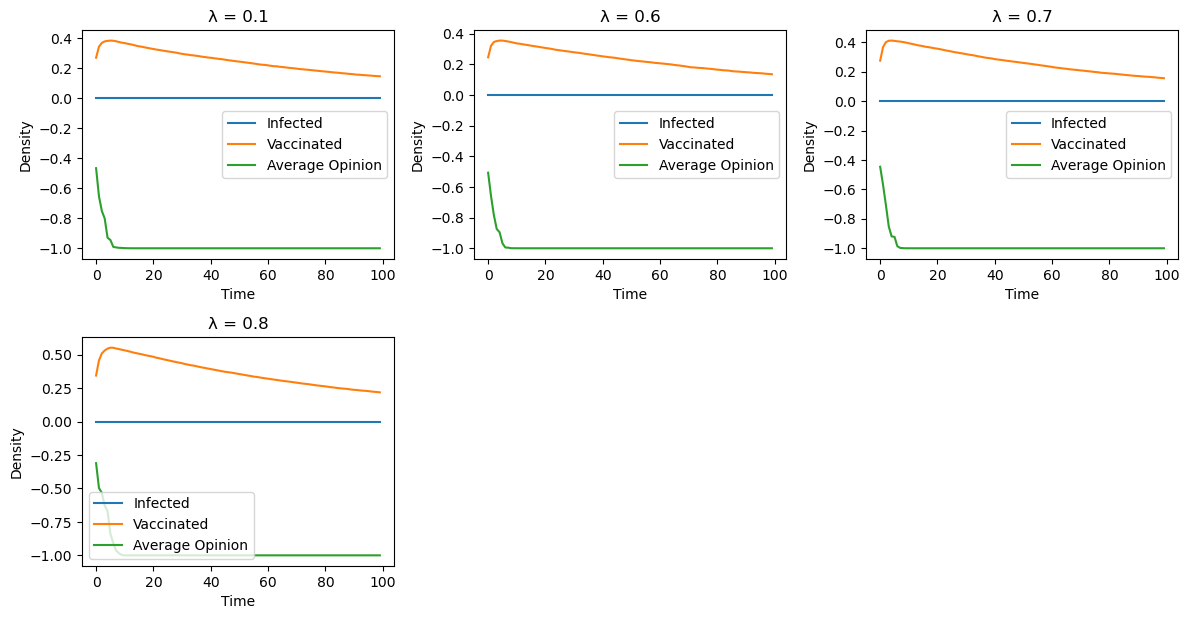

In [321]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()


- Infection remains 0 as: <br>

> new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.sum(infected) 

<br>

$I(t-1)$ calculated here is always 0. <br>
as $I$ is initialized as an array of 0s
<br><br>
and susceptible $\to$ infected never happens as:
 <br><br>

>elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value

<br>
this condition is never met as infected is always 0.


### Another Susceptible to infected definition - not in fluxogram

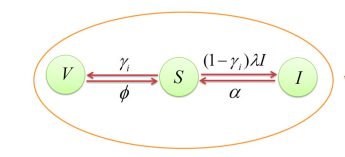

In [337]:

def simulate(lambda_value):
    global D, w, alpha, phi, N, mcs, time_series_infected, time_series_vaccinated, time_series_average_opinion
    
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) < D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    # run the simulations
    for k in range(0, mcs):
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)
        
        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.sum(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) < gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                # Susceptible -> Infected transition
                elif np.random.uniform(0, 1) < (1 - gamma[i]) * lambda_value * np.sum(infected):
                    infected[i] = 1
                    susceptible[i] = 0
                # elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value:
                #     infected[i] = 1
                #     susceptible[i] = 0
                #     print("Infection")
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) < alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) < phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


/tmp/ipykernel_30455/600304980.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


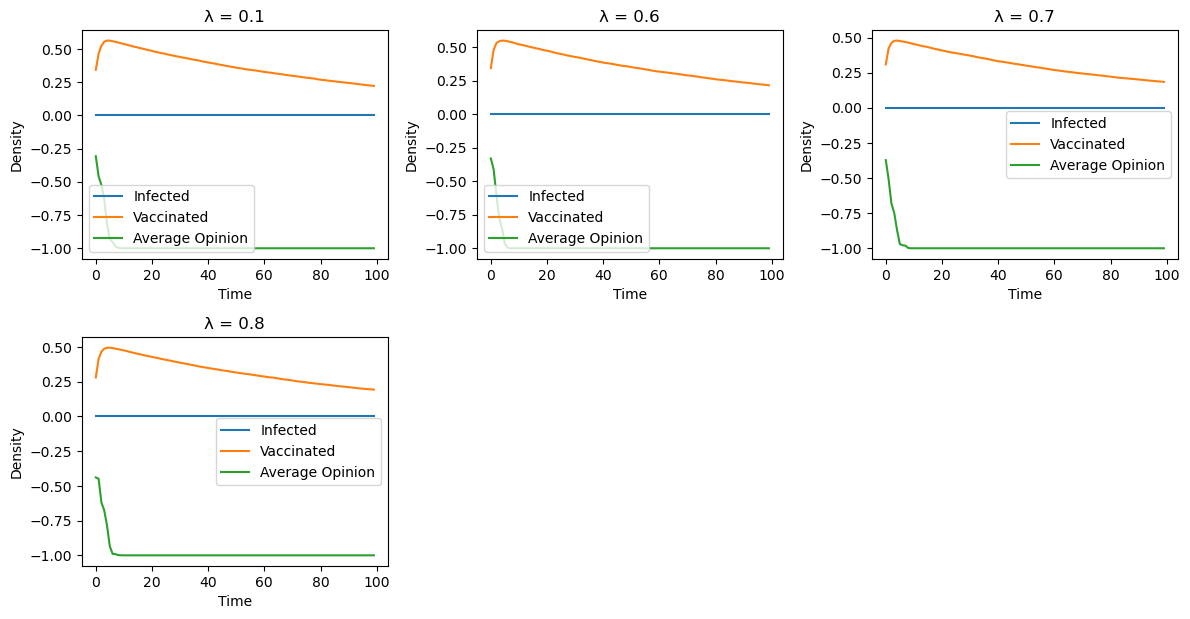

In [338]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()


### Initializing some agents as infected at t = 0
> using fluxogram condition for susceptible to infected

The conditions: <br>
$D~\ge~U(0, 1) $ <br>
$\gamma ~ \ge ~ U(0, 1)$ <br>
$\phi ~ \ge ~ U(0, 1)$ <br>
$\alpha ~ \ge ~ U(0, 1)$ <br>
$\lambda ~ \ge ~ U(0, 1)$ 

In [7]:

def simulate(lambda_value):
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    random_indices = np.random.randint(0, N, 10)
    for i in random_indices:
        infected[i] = 1
        susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    # run the simulations
    for k in range(0, mcs):
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)
        
        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.sum(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value:
                    infected[i] = 1
                    susceptible[i] = 0
                    print("Infection")
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


/tmp/ipykernel_13008/600304980.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


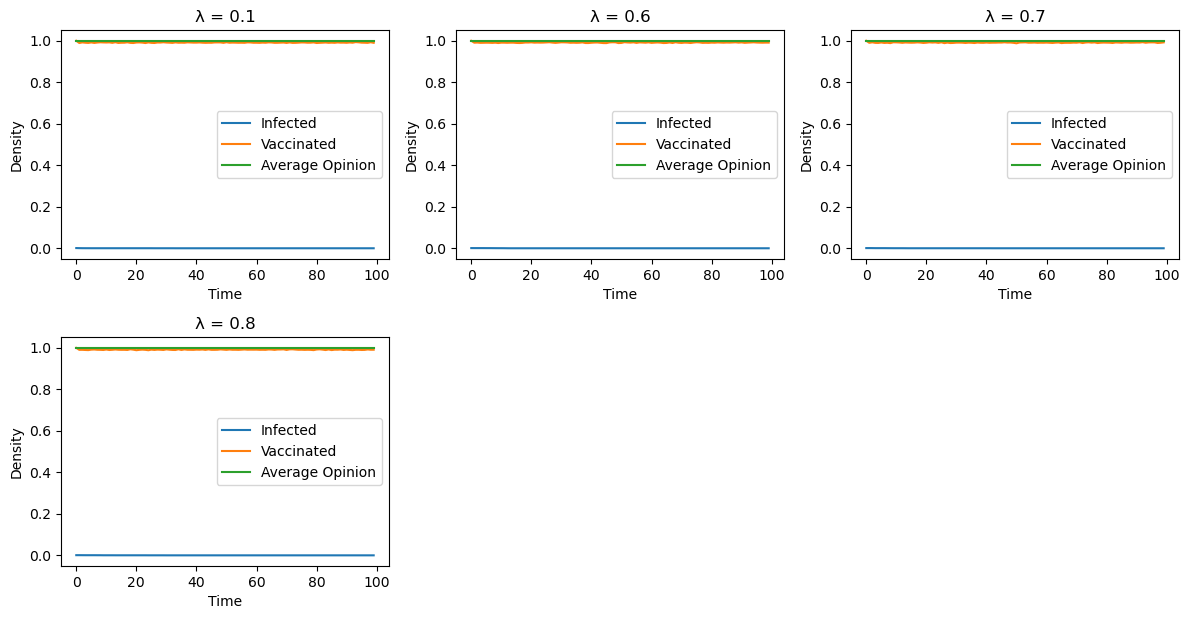

In [8]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()
